In [1]:
! pip install yfinance


  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached cffi-2.0.0-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (2.6 kB)
  Using cached pycparser-2.23-py3-none-any.whl.metadata (993 bytes)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.1/127.1 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 16.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 411.9/411.9 kB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.3/323.3 kB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.9/184.9 kB 19.0 MB/s eta 0:00:00
Using cached cffi-2.0.0-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (219 kB)
Using cached pycparser-2.23-py3-none-any.whl (118 kB)
  Created wheel for multitasking: filename=multitasking-0.0.12-py3-none-any.whl size=15636 sha256=097a37352a60211c07db9eca2d1ea566d856b32f

In [2]:
import pandas as pd
import yfinance as yf

In [20]:
tickers = ["MSFT", "GOOG", "NVDA", "META",]
data = yf.download(tickers, start="2022-01-01", end="2026-01-01",interval='1d')['Close']

[*********************100%***********************]  4 of 4 completed


In [23]:
for i in tickers:

    data[f'{i}_mean'] = data[i].rolling(window=20).mean()

    data[f'{i}_std'] = data[i].rolling(window=20).std()
    
    data[f'{i}_up'] = data[f'{i}_mean'] + (data[f'{i}_std'] * 2)
    data[f'{i}_low'] = data[f'{i}_mean'] - (data[f'{i}_std'] * 2)

data.dropna()

Ticker,GOOG,META,MSFT,NVDA,MSFT_mean,MSFT_std,MSFT_up,MSFT_low,GOOG_mean,GOOG_std,GOOG_up,GOOG_low,NVDA_mean,NVDA_std,NVDA_up,NVDA_low,META_mean,META_std,META_up,META_low
Date,,,,,,,,,,,,,,,,,,,,
2022-01-31,134.688324,311.086945,300.898926,24.438662,298.733482,10.986052,320.705587,276.761377,135.029973,5.078406,145.186784,124.873162,25.720427,2.475279,30.670985,20.769870,317.191318,14.479859,346.151035,288.231600
2022-02-01,136.852066,316.787170,298.750854,24.590366,297.476105,9.257374,315.990853,278.961357,134.672851,4.647695,143.968241,125.377461,25.446807,2.263403,29.973613,20.920002,316.221095,13.772561,343.766216,288.675974
2022-02-02,146.934448,320.759369,303.298584,25.193199,296.723811,7.997944,312.719699,280.727924,134.852502,5.052239,144.956981,124.748024,25.244798,2.080573,29.405945,21.083652,315.549289,13.163897,341.877083,289.221495
2022-02-03,141.588577,236.110672,291.484344,23.901699,295.991835,7.758697,311.509228,280.474442,135.100492,5.261413,145.623319,124.577666,25.062352,2.027031,29.116414,21.008290,311.258758,21.997839,355.254436,267.263079
2022-02-04,141.951340,235.445343,296.022339,24.271984,295.607710,7.543940,310.695590,280.519830,135.371709,5.474318,146.320344,124.423074,24.869775,1.899868,28.669510,21.070040,306.523339,27.276715,361.076769,251.969909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-12-24,315.670013,667.549988,488.019989,188.610001,483.830002,5.457175,494.744352,472.915652,313.937714,6.216099,326.369911,301.505516,180.790501,4.704637,190.199774,171.381227,653.995578,10.755877,675.507331,632.483825
2025-12-26,314.959991,663.289978,487.709991,190.529999,483.940501,5.514840,494.970181,472.910822,313.682155,6.053609,325.789372,301.574937,181.304503,5.180023,191.664549,170.944456,655.505396,9.738670,674.982735,636.028056
2025-12-29,314.390015,658.690002,487.100006,188.220001,483.695001,5.239103,494.173207,473.216796,313.406091,5.877935,325.161960,301.650222,181.865996,5.295108,192.456211,171.275781,656.068796,9.570910,675.210616,636.926975


In [29]:
data.columns

Index(['GOOG', 'META', 'MSFT', 'NVDA', 'MSFT_mean', 'MSFT_std', 'MSFT_up',
       'MSFT_low', 'GOOG_mean', 'GOOG_std', 'GOOG_up', 'GOOG_low', 'NVDA_mean',
       'NVDA_std', 'NVDA_up', 'NVDA_low', 'META_mean', 'META_std', 'META_up',
       'META_low'],
      dtype='object', name='Ticker')

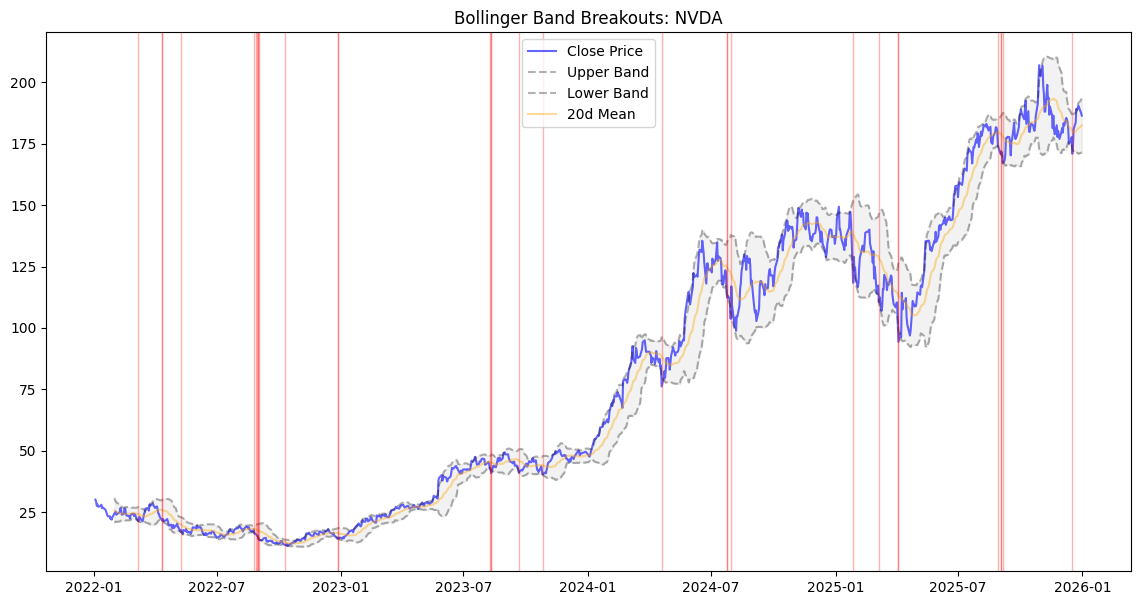

In [ ]:
import matplotlib.pyplot as plt

def plot_bollinger_breakouts(df, ticker):
    plt.figure(figsize=(14, 7))
    
    close_col = ticker
    upper_col = f'{ticker}_up'
    lower_col = f'{ticker}_low'
    mean_col = f'{ticker}_mean'
    
    # 1. Plot the Price and the Bands
    plt.plot(df.index, df[close_col], label='Close Price', color='blue', alpha=0.6)
    plt.plot(df.index, df[upper_col], label='Upper Band', color='black', linestyle='--', alpha=0.3)
    plt.plot(df.index, df[lower_col], label='Lower Band', color='black', linestyle='--', alpha=0.3)
    plt.plot(df.index, df[mean_col], label='20d Mean', color='orange', alpha=0.4)
    
    # Fill the area between bands
    plt.fill_between(df.index, df[lower_col], df[upper_col], color='gray', alpha=0.1)

    # 2. Identify and Plot Vertical Lines (Breakouts)
    # We filter the dataframe to find where price is outside the bands
    rises = df[df[close_col] > df[upper_col]]
    drops = df[df[close_col] < df[lower_col]]

    # Add vertical lines for Rises (Green)
    # for date in rises.index:
    #     plt.axvline(x=date, color='green', linestyle='-', alpha=0.3, linewidth=1)
        
    # Add vertical lines for Drops (Red)
    for date in drops.index:
        plt.axvline(x=date, color='red', linestyle='-', alpha=0.3, linewidth=1)

    plt.title(f"Bollinger Band Breakouts: {ticker}")
    plt.legend(loc='best')
    plt.show()

    return drops.index

# Example Usage:
dates_index =  plot_bollinger_breakouts(data, "NVDA")